In [ ]:
## anna jaeger wrote these scripts 

import os
import pandas as pd
import numpy as np


In [ ]:

vars = pd.read_csv('variants.tsv', sep = '\t')


In [31]:
vars

segment  position allele coding_region_change gene  Frequency_1  \
0        ha       483      T            Asn161Asn   HA       0.0000   
1        ha       492      C            Phe164Phe   HA       0.0000   
2        ha       510      A            Leu170Leu   HA       0.0000   
3        ha       513      T            Thr171Thr   HA       0.0000   
4        ha       514      A            Lys172Gln   HA       0.0000   
..      ...       ...    ...                  ...  ...          ...   
870      np       528      A            Ser176Ser   NP       0.0164   
871      np       769      A            Ile257Val   NP       0.0185   
872      np       850      G            Ala284Thr   NP       0.0505   
873      np       924      A            Gln308Gln   NP       0.0152   
874      np      1185      C            Asn395Asn   NP       0.0156   

     Frequency_2     sample  
0         1.0000     h3_sc1  
1         0.9932     h3_sc1  
2         1.0000     h3_sc1  
3         1.0000     h3_sc1  
4         1.0000     h3_sc1  
..           ...        ...  
870       0.0000  h3_stock6  
871       0.0000  h3_stock6  
872       0.0000  h3_stock6  
873       0.0000  h3_stock6  
874       0.0000  h3_stock6  

[875 rows x 8 columns]

In [32]:
vars.loc[vars['segment'] == 'na', 'gene'] = 'NA'
vars['amino_acid'] = vars['coding_region_change'].str.extract('(\d+)')


In [33]:
vars

segment  position allele coding_region_change gene  Frequency_1  \
0        ha       483      T            Asn161Asn   HA       0.0000   
1        ha       492      C            Phe164Phe   HA       0.0000   
2        ha       510      A            Leu170Leu   HA       0.0000   
3        ha       513      T            Thr171Thr   HA       0.0000   
4        ha       514      A            Lys172Gln   HA       0.0000   
..      ...       ...    ...                  ...  ...          ...   
870      np       528      A            Ser176Ser   NP       0.0164   
871      np       769      A            Ile257Val   NP       0.0185   
872      np       850      G            Ala284Thr   NP       0.0505   
873      np       924      A            Gln308Gln   NP       0.0152   
874      np      1185      C            Asn395Asn   NP       0.0156   

     Frequency_2     sample amino_acid  
0         1.0000     h3_sc1        161  
1         0.9932     h3_sc1        164  
2         1.0000     h3_sc1        170  
3         1.0000     h3_sc1        171  
4         1.0000     h3_sc1        172  
..           ...        ...        ...  
870       0.0000  h3_stock6        176  
871       0.0000  h3_stock6        257  
872       0.0000  h3_stock6        284  
873       0.0000  h3_stock6        308  
874       0.0000  h3_stock6        395  

[875 rows x 9 columns]

In [34]:
# #make merged column for gene and its position
vars['gene_pos'] = vars['gene'] + "_" + vars['amino_acid'].astype(str)


In [35]:
vars['sample_var'] = vars['sample'] + "_" + vars['gene_pos'].astype(str)


In [36]:
vars['syn_non'] = vars['coding_region_change'].apply(
    lambda x: 'synonymous' if x[:3] == x[-3:] else 'nonsynonymous'
)
vars

segment  position allele coding_region_change gene  Frequency_1  \
0        ha       483      T            Asn161Asn   HA       0.0000   
1        ha       492      C            Phe164Phe   HA       0.0000   
2        ha       510      A            Leu170Leu   HA       0.0000   
3        ha       513      T            Thr171Thr   HA       0.0000   
4        ha       514      A            Lys172Gln   HA       0.0000   
..      ...       ...    ...                  ...  ...          ...   
870      np       528      A            Ser176Ser   NP       0.0164   
871      np       769      A            Ile257Val   NP       0.0185   
872      np       850      G            Ala284Thr   NP       0.0505   
873      np       924      A            Gln308Gln   NP       0.0152   
874      np      1185      C            Asn395Asn   NP       0.0156   

     Frequency_2     sample amino_acid gene_pos        sample_var  \
0         1.0000     h3_sc1        161   HA_161     h3_sc1_HA_161   
1         0.9932     h3_sc1        164   HA_164     h3_sc1_HA_164   
2         1.0000     h3_sc1        170   HA_170     h3_sc1_HA_170   
3         1.0000     h3_sc1        171   HA_171     h3_sc1_HA_171   
4         1.0000     h3_sc1        172   HA_172     h3_sc1_HA_172   
..           ...        ...        ...      ...               ...   
870       0.0000  h3_stock6        176   NP_176  h3_stock6_NP_176   
871       0.0000  h3_stock6        257   NP_257  h3_stock6_NP_257   
872       0.0000  h3_stock6        284   NP_284  h3_stock6_NP_284   
873       0.0000  h3_stock6        308   NP_308  h3_stock6_NP_308   
874       0.0000  h3_stock6        395   NP_395  h3_stock6_NP_395   

           syn_non  
0       synonymous  
1       synonymous  
2       synonymous  
3       synonymous  
4    nonsynonymous  
..             ...  
870     synonymous  
871  nonsynonymous  
872  nonsynonymous  
873     synonymous  
874     synonymous  

[875 rows x 12 columns]

In [37]:
# Filter for synthetic controls
syn_con = vars[vars['sample'].str.contains('sc', case=False)]

# Filter for stock viruses
stock = vars[vars['sample'].str.contains('stock', case=False)]


In [38]:
syn_con

segment  position allele coding_region_change gene  Frequency_1  \
0        ha       483      T            Asn161Asn   HA       0.0000   
1        ha       492      C            Phe164Phe   HA       0.0000   
2        ha       510      A            Leu170Leu   HA       0.0000   
3        ha       513      T            Thr171Thr   HA       0.0000   
4        ha       514      A            Lys172Gln   HA       0.0000   
..      ...       ...    ...                  ...  ...          ...   
348      ns       689      C            Thr230Ile  NEP       0.4334   
349      ns       691      T           Stop231Arg  NEP       0.0101   
350      np        25      T              Ser9Pro   NP       0.0000   
351      np       106      A             Ile36Val   NP       0.0000   
352      np       185      C             Thr62Ile   NP       0.0000   

     Frequency_2  sample amino_acid gene_pos      sample_var        syn_non  
0         1.0000  h3_sc1        161   HA_161   h3_sc1_HA_161     synonymous  
1         0.9932  h3_sc1        164   HA_164   h3_sc1_HA_164     synonymous  
2         1.0000  h3_sc1        170   HA_170   h3_sc1_HA_170     synonymous  
3         1.0000  h3_sc1        171   HA_171   h3_sc1_HA_171     synonymous  
4         1.0000  h3_sc1        172   HA_172   h3_sc1_HA_172  nonsynonymous  
..           ...     ...        ...      ...             ...            ...  
348       0.0000  h3_sc3        230  NEP_230  h3_sc3_NEP_230  nonsynonymous  
349       0.0000  h3_sc3        231  NEP_231  h3_sc3_NEP_231  nonsynonymous  
350       0.0193  h3_sc4          9     NP_9     h3_sc4_NP_9  nonsynonymous  
351       0.0170  h3_sc4         36    NP_36    h3_sc4_NP_36  nonsynonymous  
352       0.0154  h3_sc4         62    NP_62    h3_sc4_NP_62  nonsynonymous  

[353 rows x 12 columns]

In [39]:
stock

segment  position allele coding_region_change gene  Frequency_1  \
353      mp       414      G            Val138Val   M1       0.0105   
354      mp       956      C           Ser319Stop   M2       0.0148   
355      mp       964      C            Gln322Lys   M2       0.0129   
356      na        99      G             Val33Val   NA       0.0114   
357      na       145      C             Gln49Lys   NA       0.0112   
..      ...       ...    ...                  ...  ...          ...   
870      np       528      A            Ser176Ser   NP       0.0164   
871      np       769      A            Ile257Val   NP       0.0185   
872      np       850      G            Ala284Thr   NP       0.0505   
873      np       924      A            Gln308Gln   NP       0.0152   
874      np      1185      C            Asn395Asn   NP       0.0156   

     Frequency_2     sample amino_acid gene_pos        sample_var  \
353          0.0  h3_stock1        138   M1_138  h3_stock1_M1_138   
354          0.0  h3_stock1        319   M2_319  h3_stock1_M2_319   
355          0.0  h3_stock1        322   M2_322  h3_stock1_M2_322   
356          0.0  h3_stock1         33    NA_33   h3_stock1_NA_33   
357          0.0  h3_stock1         49    NA_49   h3_stock1_NA_49   
..           ...        ...        ...      ...               ...   
870          0.0  h3_stock6        176   NP_176  h3_stock6_NP_176   
871          0.0  h3_stock6        257   NP_257  h3_stock6_NP_257   
872          0.0  h3_stock6        284   NP_284  h3_stock6_NP_284   
873          0.0  h3_stock6        308   NP_308  h3_stock6_NP_308   
874          0.0  h3_stock6        395   NP_395  h3_stock6_NP_395   

           syn_non  
353     synonymous  
354  nonsynonymous  
355  nonsynonymous  
356     synonymous  
357  nonsynonymous  
..             ...  
870     synonymous  
871  nonsynonymous  
872  nonsynonymous  
873     synonymous  
874     synonymous  

[522 rows x 12 columns]

[Text(0.5, 0, 'Rep 1 Frequency'), Text(0, 0.5, 'Rep 2 Frequency')]

<Figure size 800x800 with 0 Axes>

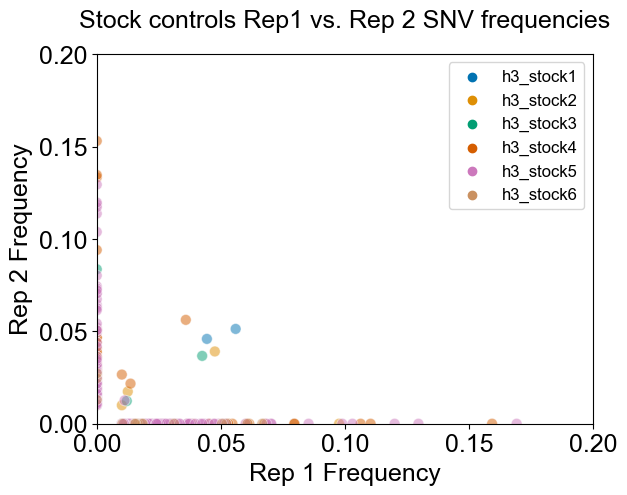

In [40]:
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

plt.rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8, 8))  # Adjust figure size

fig, ax = plt.subplots()

sns.scatterplot(data=stock, x="Frequency_1", y="Frequency_2", s=60, alpha=.5, hue='sample', palette='colorblind')
plt.ylim(0, 0.2)
plt.xlim(0, 0.2)
plt.title('Stock controls Rep1 vs. Rep 2 SNV frequencies', y=1.05, fontsize=18)
plt.legend(loc='best', fontsize=12)
ax.set(xlabel='Rep 1 Frequency', ylabel='Rep 2 Frequency')


# # Format y-axis to show integers
# fmtr = tkr.StrMethodFormatter('{x:.1f}')
# ax.xaxis.set_major_formatter(fmtr)
# ax.yaxis.set_major_formatter(fmtr)

[Text(0.5, 0, 'Rep 1 Frequency'), Text(0, 0.5, 'Rep 2 Frequency')]

<Figure size 800x800 with 0 Axes>

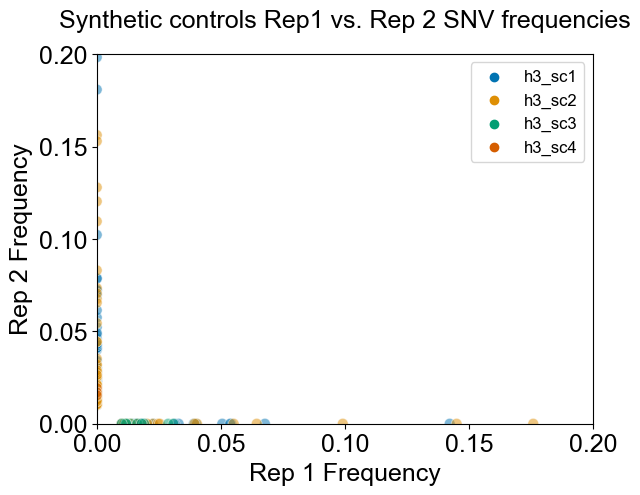

In [41]:
import seaborn as sns 
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as tkr

plt.rc('font',**{'family':'sans-serif','sans-serif':['Arial']})
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(8, 8))  # Adjust figure size

fig, ax = plt.subplots()

sns.scatterplot(data=syn_con, x="Frequency_1", y="Frequency_2", s=60, alpha=.5, hue='sample', palette='colorblind')
plt.ylim(0, 0.2)
plt.xlim(0, 0.2)
plt.title('Synthetic controls Rep1 vs. Rep 2 SNV frequencies', y=1.05, fontsize=18)
plt.legend(loc='best', fontsize=12)
ax.set(xlabel='Rep 1 Frequency', ylabel='Rep 2 Frequency')


# # Format y-axis to show integers
# fmtr = tkr.StrMethodFormatter('{x:.1f}')
# ax.xaxis.set_major_formatter(fmtr)
# ax.yaxis.set_major_formatter(fmtr)

In [42]:
stock['rep_shared'] = np.where(
    (stock['Frequency_1'].fillna(0) > 0) & (stock['Frequency_2'].fillna(0) > 0),
    'shared',
    'single'
)
stock

/var/folders/b4/087mzk6d6sj828w5t9xtml640000gr/T/ipykernel_6558/1077834342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock['rep_shared'] = np.where(


segment  position allele coding_region_change gene  Frequency_1  \
353      mp       414      G            Val138Val   M1       0.0105   
354      mp       956      C           Ser319Stop   M2       0.0148   
355      mp       964      C            Gln322Lys   M2       0.0129   
356      na        99      G             Val33Val   NA       0.0114   
357      na       145      C             Gln49Lys   NA       0.0112   
..      ...       ...    ...                  ...  ...          ...   
870      np       528      A            Ser176Ser   NP       0.0164   
871      np       769      A            Ile257Val   NP       0.0185   
872      np       850      G            Ala284Thr   NP       0.0505   
873      np       924      A            Gln308Gln   NP       0.0152   
874      np      1185      C            Asn395Asn   NP       0.0156   

     Frequency_2     sample amino_acid gene_pos        sample_var  \
353          0.0  h3_stock1        138   M1_138  h3_stock1_M1_138   
354          0.0  h3_stock1        319   M2_319  h3_stock1_M2_319   
355          0.0  h3_stock1        322   M2_322  h3_stock1_M2_322   
356          0.0  h3_stock1         33    NA_33   h3_stock1_NA_33   
357          0.0  h3_stock1         49    NA_49   h3_stock1_NA_49   
..           ...        ...        ...      ...               ...   
870          0.0  h3_stock6        176   NP_176  h3_stock6_NP_176   
871          0.0  h3_stock6        257   NP_257  h3_stock6_NP_257   
872          0.0  h3_stock6        284   NP_284  h3_stock6_NP_284   
873          0.0  h3_stock6        308   NP_308  h3_stock6_NP_308   
874          0.0  h3_stock6        395   NP_395  h3_stock6_NP_395   

           syn_non rep_shared  
353     synonymous     single  
354  nonsynonymous     single  
355  nonsynonymous     single  
356     synonymous     single  
357  nonsynonymous     single  
..             ...        ...  
870     synonymous     single  
871  nonsynonymous     single  
872  nonsynonymous     single  
873     synonymous     single  
874     synonymous     single  

[522 rows x 13 columns]

In [43]:
syn_con['rep_shared'] = np.where(
    (syn_con['Frequency_1'].fillna(0) > 0) & (syn_con['Frequency_2'].fillna(0) > 0),
    'shared',
    'single'
)
syn_con

/var/folders/b4/087mzk6d6sj828w5t9xtml640000gr/T/ipykernel_6558/2424620803.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  syn_con['rep_shared'] = np.where(


segment  position allele coding_region_change gene  Frequency_1  \
0        ha       483      T            Asn161Asn   HA       0.0000   
1        ha       492      C            Phe164Phe   HA       0.0000   
2        ha       510      A            Leu170Leu   HA       0.0000   
3        ha       513      T            Thr171Thr   HA       0.0000   
4        ha       514      A            Lys172Gln   HA       0.0000   
..      ...       ...    ...                  ...  ...          ...   
348      ns       689      C            Thr230Ile  NEP       0.4334   
349      ns       691      T           Stop231Arg  NEP       0.0101   
350      np        25      T              Ser9Pro   NP       0.0000   
351      np       106      A             Ile36Val   NP       0.0000   
352      np       185      C             Thr62Ile   NP       0.0000   

     Frequency_2  sample amino_acid gene_pos      sample_var        syn_non  \
0         1.0000  h3_sc1        161   HA_161   h3_sc1_HA_161     synonymous   
1         0.9932  h3_sc1        164   HA_164   h3_sc1_HA_164     synonymous   
2         1.0000  h3_sc1        170   HA_170   h3_sc1_HA_170     synonymous   
3         1.0000  h3_sc1        171   HA_171   h3_sc1_HA_171     synonymous   
4         1.0000  h3_sc1        172   HA_172   h3_sc1_HA_172  nonsynonymous   
..           ...     ...        ...      ...             ...            ...   
348       0.0000  h3_sc3        230  NEP_230  h3_sc3_NEP_230  nonsynonymous   
349       0.0000  h3_sc3        231  NEP_231  h3_sc3_NEP_231  nonsynonymous   
350       0.0193  h3_sc4          9     NP_9     h3_sc4_NP_9  nonsynonymous   
351       0.0170  h3_sc4         36    NP_36    h3_sc4_NP_36  nonsynonymous   
352       0.0154  h3_sc4         62    NP_62    h3_sc4_NP_62  nonsynonymous   

    rep_shared  
0       single  
1       single  
2       single  
3       single  
4       single  
..         ...  
348     single  
349     single  
350     single  
351     single  
352     single  

[353 rows x 13 columns]

In [44]:
stock['rep_shared'].value_counts()


single    511
shared     11
Name: rep_shared, dtype: int64

In [45]:
syn_con['rep_shared'].value_counts()

single    353
Name: rep_shared, dtype: int64

In [46]:
stock_sorted = stock.sort_values(by=['sample', 'gene', 'position'], ascending=[False, True, True])
stock_sorted.tail(15)

segment  position allele coding_region_change gene  Frequency_1  \
364      ns       433      A            Ile145Val  NS1       0.0103   
366      pa       199      G             Asp67Tyr   PA       0.0150   
367      pa      1465      T            Cys489Ser   PA       0.0560   
368      pa      1522      A            Arg508Gly   PA       0.0108   
369      pa      1578      T            Ser526Ser   PA       0.0000   
370      pa      1626      T            Val542Val   PA       0.0106   
371      pa      1653      G            Arg551Ser   PA       0.0108   
372      pa      1666      C            Gln556Lys   PA       0.0129   
373     pb2       143      A             Lys48Arg  PB2       0.0145   
374     pb2       498      C            Val166Val  PB2       0.0196   
375     pb2       651      T            Phe217Phe  PB2       0.0121   
376     pb2      1089      C            Phe363Leu  PB2       0.0120   
377     pb2      1340      A            Gln447Arg  PB2       0.0120   
378     pb2      1643      A            Asn548Ser  PB2       0.0000   
379     pb2      2105      A            Lys702Arg  PB2       0.0104   

     Frequency_2     sample amino_acid gene_pos         sample_var  \
364       0.0000  h3_stock1        145  NS1_145  h3_stock1_NS1_145   
366       0.0000  h3_stock1         67    PA_67    h3_stock1_PA_67   
367       0.0513  h3_stock1        489   PA_489   h3_stock1_PA_489   
368       0.0000  h3_stock1        508   PA_508   h3_stock1_PA_508   
369       0.0106  h3_stock1        526   PA_526   h3_stock1_PA_526   
370       0.0000  h3_stock1        542   PA_542   h3_stock1_PA_542   
371       0.0000  h3_stock1        551   PA_551   h3_stock1_PA_551   
372       0.0000  h3_stock1        556   PA_556   h3_stock1_PA_556   
373       0.0000  h3_stock1         48   PB2_48   h3_stock1_PB2_48   
374       0.0000  h3_stock1        166  PB2_166  h3_stock1_PB2_166   
375       0.0000  h3_stock1        217  PB2_217  h3_stock1_PB2_217   
376       0.0000  h3_stock1        363  PB2_363  h3_stock1_PB2_363   
377       0.0000  h3_stock1        447  PB2_447  h3_stock1_PB2_447   
378       0.0109  h3_stock1        548  PB2_548  h3_stock1_PB2_548   
379       0.0000  h3_stock1        702  PB2_702  h3_stock1_PB2_702   

           syn_non rep_shared  
364  nonsynonymous     single  
366  nonsynonymous     single  
367  nonsynonymous     shared  
368  nonsynonymous     single  
369     synonymous     single  
370     synonymous     single  
371  nonsynonymous     single  
372  nonsynonymous     single  
373  nonsynonymous     single  
374     synonymous     single  
375     synonymous     single  
376  nonsynonymous     single  
377  nonsynonymous     single  
378  nonsynonymous     single  
379  nonsynonymous     single

In [47]:
syn_sorted = syn_con.sort_values(by=['sample', 'gene', 'position'], ascending=[False, True, True])
syn_sorted.tail(15)

segment  position allele coding_region_change gene  Frequency_1  \
207     pb1      1823      A            Glu608Gly  PB1       0.0189   
208     pb1      1872      T            Leu624Leu  PB1       0.0172   
209     pb1      1877      A            Asn626Ser  PB1       0.0129   
210     pb1      2000      A            Asn667Ser  PB1       0.0400   
211     pb1      2012      A            Asn671Ser  PB1       0.0228   
212     pb1      2043      A            Gly681Gly  PB1       0.0161   
213     pb1      2071      A            Lys691Glu  PB1       0.0000   
214     pb1      2096      T            Phe699Ser  PB1       0.0000   
215     pb1      2134      T            Ser712Pro  PB1       0.0000   
216     pb1      2190      C            Phe730Phe  PB1       0.0538   
217     pb1      2216      A            Glu739Gly  PB1       0.0180   
218     pb1      2269      A            Lys757Glu  PB1       0.0000   
219     pb2        98      A             Lys33Arg  PB2       0.0000   
220     pb2      2239      A            Ser747Gly  PB2       0.0000   
221     pb2      2254      A            Lys752Glu  PB2       0.0000   

     Frequency_2  sample amino_acid gene_pos      sample_var        syn_non  \
207       0.0000  h3_sc1        608  PB1_608  h3_sc1_PB1_608  nonsynonymous   
208       0.0000  h3_sc1        624  PB1_624  h3_sc1_PB1_624     synonymous   
209       0.0000  h3_sc1        626  PB1_626  h3_sc1_PB1_626  nonsynonymous   
210       0.0000  h3_sc1        667  PB1_667  h3_sc1_PB1_667  nonsynonymous   
211       0.0000  h3_sc1        671  PB1_671  h3_sc1_PB1_671  nonsynonymous   
212       0.0000  h3_sc1        681  PB1_681  h3_sc1_PB1_681     synonymous   
213       0.0168  h3_sc1        691  PB1_691  h3_sc1_PB1_691  nonsynonymous   
214       0.0201  h3_sc1        699  PB1_699  h3_sc1_PB1_699  nonsynonymous   
215       0.0481  h3_sc1        712  PB1_712  h3_sc1_PB1_712  nonsynonymous   
216       0.0000  h3_sc1        730  PB1_730  h3_sc1_PB1_730     synonymous   
217       0.0000  h3_sc1        739  PB1_739  h3_sc1_PB1_739  nonsynonymous   
218       0.0216  h3_sc1        757  PB1_757  h3_sc1_PB1_757  nonsynonymous   
219       0.0205  h3_sc1         33   PB2_33   h3_sc1_PB2_33  nonsynonymous   
220       0.0491  h3_sc1        747  PB2_747  h3_sc1_PB2_747  nonsynonymous   
221       0.0286  h3_sc1        752  PB2_752  h3_sc1_PB2_752  nonsynonymous   

    rep_shared  
207     single  
208     single  
209     single  
210     single  
211     single  
212     single  
213     single  
214     single  
215     single  
216     single  
217     single  
218     single  
219     single  
220     single  
221     single

In [48]:
stock_result = stock.groupby('gene')['rep_shared'].value_counts()
stock_result

gene  rep_shared
HA    single         15
M1    single         24
M2    single         12
NA    single         73
NEP   single          4
NP    single         96
      shared          8
NS1   single         24
      shared          1
PA    single        109
      shared          1
PB1   single         42
PB2   single        112
      shared          1
Name: rep_shared, dtype: int64

In [50]:
syn_result = syn_con.groupby('gene')['rep_shared'].value_counts()
syn_result

gene  rep_shared
HA    single        45
M1    single        41
M2    single        18
NA    single        57
NEP   single         9
NP    single        72
NS1   single        31
PA    single        46
PB1   single        31
PB2   single         3
Name: rep_shared, dtype: int64

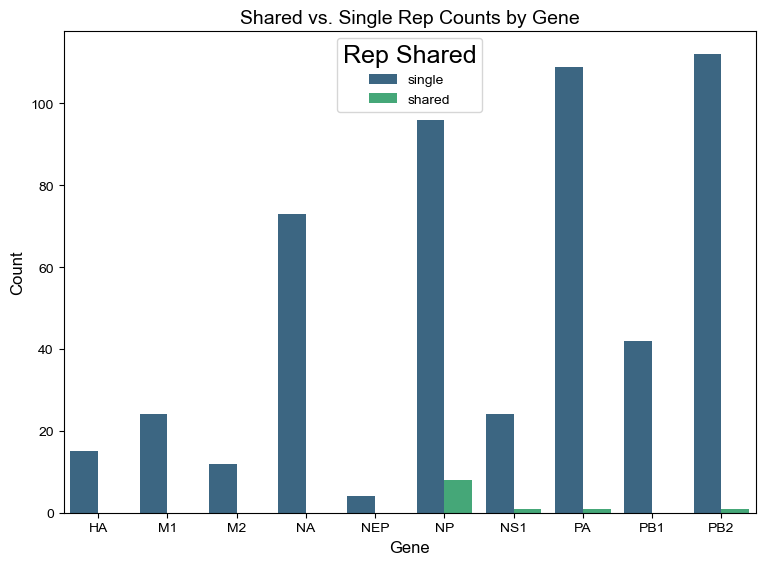

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Group by 'gene' and count unique values in 'rep_shared'
result = stock.groupby('gene')['rep_shared'].value_counts().reset_index(name='count')

# Create a bar plot using seaborn
plt.figure(figsize=(8, 6))
sns.barplot(data=result, x='gene', y='count', hue='rep_shared', palette='viridis')

# Add labels and title
plt.xlabel('Gene', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Shared vs. Single Rep Counts by Gene', fontsize=14)
plt.legend(title='Rep Shared', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()
# plt.savefig("seq/analysis/figures/shared_vs_singlerep_countsbygene.pdf", bbox_inches='tight', dpi=300)


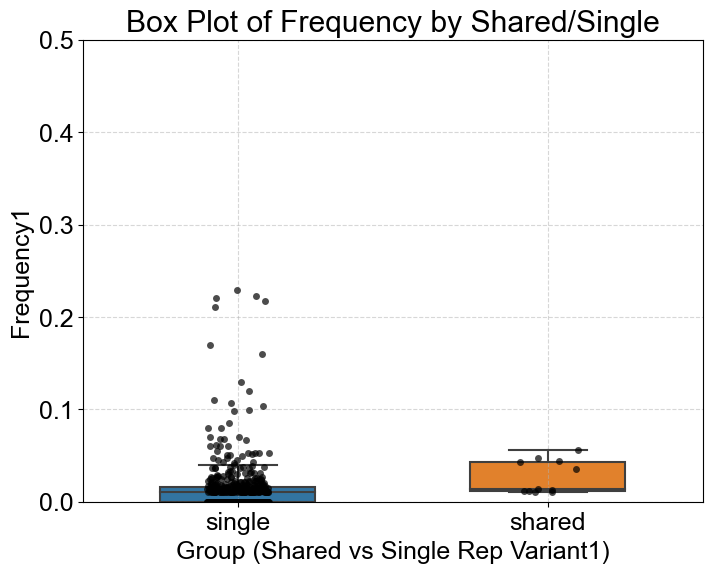

In [52]:
# Create box plot with individual data points
plt.figure(figsize=(8, 6))
sns.boxplot(x='rep_shared', y='Frequency_1', data=stock, width=0.5, showfliers=False)  # Box plot
sns.stripplot(x='rep_shared', y='Frequency_1', data=stock, jitter=True, color='black', alpha=0.7)  # Individual points

# Customize plot
plt.xlabel("Group (Shared vs Single Rep Variant1)")
plt.ylabel("Frequency1")
plt.title("Box Plot of Frequency by Shared/Single")
plt.grid(True, linestyle="--", alpha=0.5)
# plt.yscale('logit')
plt.ylim(0, 0.5)

# Show plot
plt.show()

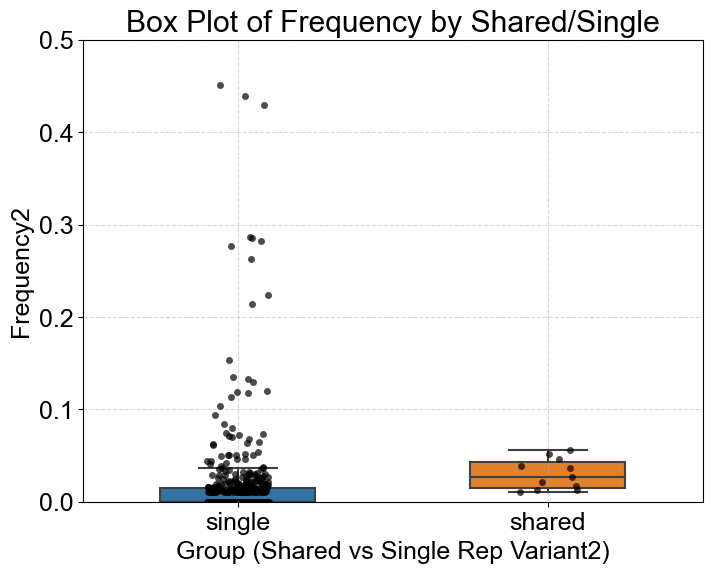

In [57]:
# Create box plot with individual data points
plt.figure(figsize=(8, 6))
sns.boxplot(x='rep_shared', y='Frequency_2', data=stock, width=0.5, showfliers=False)  # Box plot
sns.stripplot(x='rep_shared', y='Frequency_2', data=stock, jitter=True, color='black', alpha=0.7)  # Individual points

# Customize plot
plt.xlabel("Group (Shared vs Single Rep Variant2)")
plt.ylabel("Frequency2")
plt.title("Box Plot of Frequency by Shared/Single")
plt.grid(True, linestyle="--", alpha=0.5)
# plt.yscale('logit')
plt.ylim(0, 0.5)

# Show plot
plt.show()

In [59]:
import scipy.stats as stats

# Calculate means
stock = stock.dropna(subset=["Frequency_1"])

means = stock.groupby("rep_shared")["Frequency_1"].mean()
print("Mean Frequency1 by Group:")
print(means)

# Perform independent t-test
shared = stocks[stocks["rep_shared"] == "shared"]["rep_shared"]
single = stocks[stocks["rep_shared"] == "single"]["rep_shared"]

# t_stat, p_value = stats.ttest_ind(shared, single, equal_var=False)  # Welch's t-test (better for unequal variances)

# # Display results
# print(f"\nT-test results:\nT-statistic = {t_stat:.4f}, P-value = {p_value:.4e}")


Mean Frequency1 by Group:
rep_shared
shared    0.026909
single    0.015396
Name: Frequency_1, dtype: float64


In [60]:
import scipy.stats as stats

# Calculate means
stock = stock.dropna(subset=["Frequency_2"])

means = stock.groupby("rep_shared")["Frequency_2"].mean()
print("Mean Frequency2 by Group:")
print(means)

# Perform independent t-test
shared = stock[stock["rep_shared"] == "shared"]["rep_shared"]
single = stock[stock["rep_shared"] == "single"]["rep_shared"]

# t_stat, p_value = stats.ttest_ind(shared, single, equal_var=False)  # Welch's t-test (better for unequal variances)

# # Display results
# print(f"\nT-test results:\nT-statistic = {t_stat:.4f}, P-value = {p_value:.4e}")


Mean Frequency2 by Group:
rep_shared
shared    0.029982
single    0.017350
Name: Frequency_2, dtype: float64


In [62]:
single_rep_stocks = stock[stock['rep_shared'] == 'single']

In [63]:
# single_rep_vars['avg_freq'] = single_rep_vars['frequency']
single_rep_stocks['avg_freq'] = single_rep_stocks['Frequency_1'] + single_rep_stocks['Frequency_2']

single_rep_stocks

/var/folders/b4/087mzk6d6sj828w5t9xtml640000gr/T/ipykernel_6558/1080223393.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  single_rep_stocks['avg_freq'] = single_rep_stocks['Frequency_1'] + single_rep_stocks['Frequency_2']


segment  position allele coding_region_change gene  Frequency_1  \
353      mp       414      G            Val138Val   M1       0.0105   
354      mp       956      C           Ser319Stop   M2       0.0148   
355      mp       964      C            Gln322Lys   M2       0.0129   
356      na        99      G             Val33Val   NA       0.0114   
357      na       145      C             Gln49Lys   NA       0.0112   
..      ...       ...    ...                  ...  ...          ...   
870      np       528      A            Ser176Ser   NP       0.0164   
871      np       769      A            Ile257Val   NP       0.0185   
872      np       850      G            Ala284Thr   NP       0.0505   
873      np       924      A            Gln308Gln   NP       0.0152   
874      np      1185      C            Asn395Asn   NP       0.0156   

     Frequency_2     sample amino_acid gene_pos        sample_var  \
353          0.0  h3_stock1        138   M1_138  h3_stock1_M1_138   
354          0.0  h3_stock1        319   M2_319  h3_stock1_M2_319   
355          0.0  h3_stock1        322   M2_322  h3_stock1_M2_322   
356          0.0  h3_stock1         33    NA_33   h3_stock1_NA_33   
357          0.0  h3_stock1         49    NA_49   h3_stock1_NA_49   
..           ...        ...        ...      ...               ...   
870          0.0  h3_stock6        176   NP_176  h3_stock6_NP_176   
871          0.0  h3_stock6        257   NP_257  h3_stock6_NP_257   
872          0.0  h3_stock6        284   NP_284  h3_stock6_NP_284   
873          0.0  h3_stock6        308   NP_308  h3_stock6_NP_308   
874          0.0  h3_stock6        395   NP_395  h3_stock6_NP_395   

           syn_non rep_shared  avg_freq  
353     synonymous     single    0.0105  
354  nonsynonymous     single    0.0148  
355  nonsynonymous     single    0.0129  
356     synonymous     single    0.0114  
357  nonsynonymous     single    0.0112  
..             ...        ...       ...  
870     synonymous     single    0.0164  
871  nonsynonymous     single    0.0185  
872  nonsynonymous     single    0.0505  
873     synonymous     single    0.0152  
874     synonymous     single    0.0156  

[511 rows x 14 columns]

In [64]:
shared_stock = stock[stock['rep_shared'] == 'shared']
# shared_vars = shared_vars.sort_values(by=['sample_ID', 'gene', 'reference_position'], ascending=[True, True, True])
shared_stock['avg_freq'] = shared_stock[['Frequency_1', 'Frequency_2']].mean(axis=1)

shared_stock

/var/folders/b4/087mzk6d6sj828w5t9xtml640000gr/T/ipykernel_6558/3894898526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shared_stock['avg_freq'] = shared_stock[['Frequency_1', 'Frequency_2']].mean(axis=1)


segment  position allele coding_region_change gene  Frequency_1  \
361      np       168      G             Leu56Leu   NP       0.0444   
367      pa      1465      T            Cys489Ser   PA       0.0560   
382      np       168      G             Leu56Leu   NP       0.0476   
388      np      1479      A            Ala493Ala   NP       0.0125   
391      ns       433      A            Ile145Val  NS1       0.0101   
412      np       168      G             Leu56Leu   NP       0.0425   
414      np      1479      A            Ala493Ala   NP       0.0121   
488      np       168      G             Leu56Leu   NP       0.0359   
510      np      1152      A            Arg384Arg   NP       0.0136   
518      np      1482      A            Glu494Glu   NP       0.0101   
818     pb2      1025      A            Glu342Gly  PB2       0.0112   

     Frequency_2     sample amino_acid gene_pos         sample_var  \
361       0.0459  h3_stock1         56    NP_56    h3_stock1_NP_56   
367       0.0513  h3_stock1        489   PA_489   h3_stock1_PA_489   
382       0.0391  h3_stock2         56    NP_56    h3_stock2_NP_56   
388       0.0174  h3_stock2        493   NP_493   h3_stock2_NP_493   
391       0.0100  h3_stock2        145  NS1_145  h3_stock2_NS1_145   
412       0.0367  h3_stock3         56    NP_56    h3_stock3_NP_56   
414       0.0123  h3_stock3        493   NP_493   h3_stock3_NP_493   
488       0.0562  h3_stock4         56    NP_56    h3_stock4_NP_56   
510       0.0217  h3_stock4        384   NP_384   h3_stock4_NP_384   
518       0.0266  h3_stock4        494   NP_494   h3_stock4_NP_494   
818       0.0126  h3_stock5        342  PB2_342  h3_stock5_PB2_342   

           syn_non rep_shared  avg_freq  
361     synonymous     shared   0.04515  
367  nonsynonymous     shared   0.05365  
382     synonymous     shared   0.04335  
388     synonymous     shared   0.01495  
391  nonsynonymous     shared   0.01005  
412     synonymous     shared   0.03960  
414     synonymous     shared   0.01220  
488     synonymous     shared   0.04605  
510     synonymous     shared   0.01765  
518     synonymous     shared   0.01835  
818  nonsynonymous     shared   0.01190

In [66]:
##since i needed to get avg vars differently for single and shared, did that now will concat together for big vars df
stocks = pd.concat([single_rep_stocks, shared_stock], ignore_index=True)
stocks

segment  position allele coding_region_change gene  Frequency_1  \
0        mp       414      G            Val138Val   M1       0.0105   
1        mp       956      C           Ser319Stop   M2       0.0148   
2        mp       964      C            Gln322Lys   M2       0.0129   
3        na        99      G             Val33Val   NA       0.0114   
4        na       145      C             Gln49Lys   NA       0.0112   
..      ...       ...    ...                  ...  ...          ...   
517      np      1479      A            Ala493Ala   NP       0.0121   
518      np       168      G             Leu56Leu   NP       0.0359   
519      np      1152      A            Arg384Arg   NP       0.0136   
520      np      1482      A            Glu494Glu   NP       0.0101   
521     pb2      1025      A            Glu342Gly  PB2       0.0112   

     Frequency_2     sample amino_acid gene_pos         sample_var  \
0         0.0000  h3_stock1        138   M1_138   h3_stock1_M1_138   
1         0.0000  h3_stock1        319   M2_319   h3_stock1_M2_319   
2         0.0000  h3_stock1        322   M2_322   h3_stock1_M2_322   
3         0.0000  h3_stock1         33    NA_33    h3_stock1_NA_33   
4         0.0000  h3_stock1         49    NA_49    h3_stock1_NA_49   
..           ...        ...        ...      ...                ...   
517       0.0123  h3_stock3        493   NP_493   h3_stock3_NP_493   
518       0.0562  h3_stock4         56    NP_56    h3_stock4_NP_56   
519       0.0217  h3_stock4        384   NP_384   h3_stock4_NP_384   
520       0.0266  h3_stock4        494   NP_494   h3_stock4_NP_494   
521       0.0126  h3_stock5        342  PB2_342  h3_stock5_PB2_342   

           syn_non rep_shared  avg_freq  
0       synonymous     single   0.01050  
1    nonsynonymous     single   0.01480  
2    nonsynonymous     single   0.01290  
3       synonymous     single   0.01140  
4    nonsynonymous     single   0.01120  
..             ...        ...       ...  
517     synonymous     shared   0.01220  
518     synonymous     shared   0.04605  
519     synonymous     shared   0.01765  
520     synonymous     shared   0.01835  
521  nonsynonymous     shared   0.01190  

[522 rows x 14 columns]

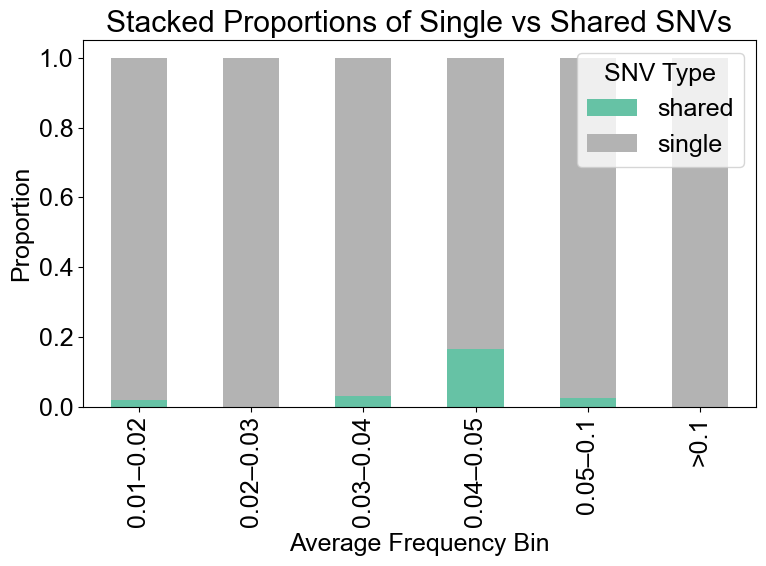

In [69]:
# Example bin edges
bins = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, float('inf')]
labels = ['0.01–0.02', '0.02–0.03', '0.03–0.04', '0.04–0.05', '0.05–0.1', '>0.1']
stocks['freq_bin'] = pd.cut(stocks['avg_freq'], bins=bins, labels=labels, right=False)

# Count occurrences of each category in each bin
grouped = stocks.groupby(['freq_bin', 'rep_shared']).size().reset_index(name='count')

# Normalize within each bin
grouped['proportion'] = grouped.groupby('freq_bin')['count'].transform(lambda x: x / x.sum())

# plt.figure(figsize=(8, 6))
# sns.barplot(data=grouped, x='freq_bin', y='proportion', hue='rep_shared')

# plt.xlabel('Average Frequency Bin')
# plt.ylabel('Proportion')
# plt.title('Proportion of Single vs Shared SNVs by Frequency Bin')
# plt.legend(title='SNV Type')
# plt.tight_layout()
# plt.show()

# Pivot data for stacked bar chart
pivot_df = grouped.pivot(index='freq_bin', columns='rep_shared', values='proportion').fillna(0)

# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

plt.xlabel('Average Frequency Bin')
plt.ylabel('Proportion')
plt.title('Stacked Proportions of Single vs Shared SNVs')
plt.legend(title='SNV Type')
plt.tight_layout()
plt.show()


In [73]:
freq1 = stocks.drop(columns=['Frequency_2'])
freq1 = freq1[freq1['Frequency_1'] != 0]

freq2 = stocks.drop(columns=['Frequency_1'])
freq2 = freq2[freq2['Frequency_2'] != 0]

freq1 = freq1.rename(columns={'Frequency_1': 'Frequency'})
freq2 = freq2.rename(columns={'Frequency_2': 'Frequency'})


In [74]:
freq_stacked = pd.concat([freq1, freq2], axis=0)
freq_stacked = freq_stacked.drop('freq_bin', axis=1)

freq_stacked

segment  position allele coding_region_change gene  Frequency     sample  \
0        mp       414      G            Val138Val   M1     0.0105  h3_stock1   
1        mp       956      C           Ser319Stop   M2     0.0148  h3_stock1   
2        mp       964      C            Gln322Lys   M2     0.0129  h3_stock1   
3        na        99      G             Val33Val   NA     0.0114  h3_stock1   
4        na       145      C             Gln49Lys   NA     0.0112  h3_stock1   
..      ...       ...    ...                  ...  ...        ...        ...   
517      np      1479      A            Ala493Ala   NP     0.0123  h3_stock3   
518      np       168      G             Leu56Leu   NP     0.0562  h3_stock4   
519      np      1152      A            Arg384Arg   NP     0.0217  h3_stock4   
520      np      1482      A            Glu494Glu   NP     0.0266  h3_stock4   
521     pb2      1025      A            Glu342Gly  PB2     0.0126  h3_stock5   

    amino_acid gene_pos         sample_var        syn_non rep_shared  avg_freq  
0          138   M1_138   h3_stock1_M1_138     synonymous     single   0.01050  
1          319   M2_319   h3_stock1_M2_319  nonsynonymous     single   0.01480  
2          322   M2_322   h3_stock1_M2_322  nonsynonymous     single   0.01290  
3           33    NA_33    h3_stock1_NA_33     synonymous     single   0.01140  
4           49    NA_49    h3_stock1_NA_49  nonsynonymous     single   0.01120  
..         ...      ...                ...            ...        ...       ...  
517        493   NP_493   h3_stock3_NP_493     synonymous     shared   0.01220  
518         56    NP_56    h3_stock4_NP_56     synonymous     shared   0.04605  
519        384   NP_384   h3_stock4_NP_384     synonymous     shared   0.01765  
520        494   NP_494   h3_stock4_NP_494     synonymous     shared   0.01835  
521        342  PB2_342  h3_stock5_PB2_342  nonsynonymous     shared   0.01190  

[533 rows x 13 columns]

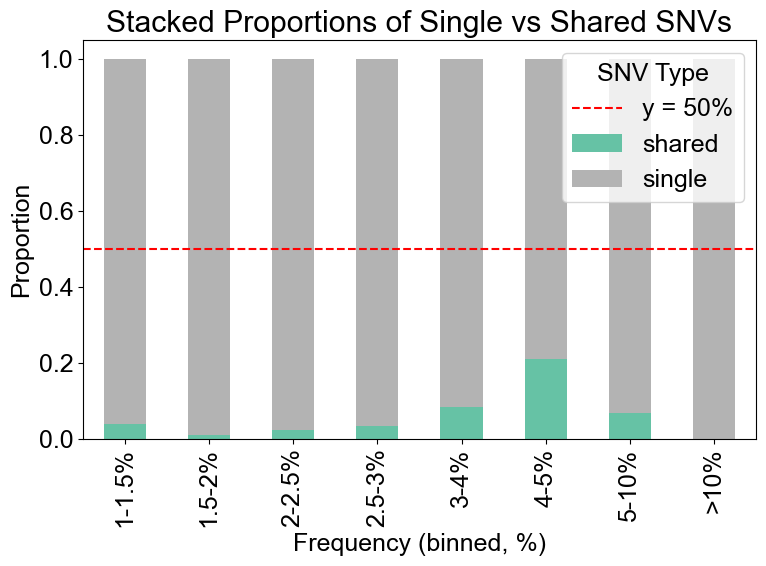

In [75]:
# Example bin edges
bins = [0.01, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.1, float('inf')]
labels = ['1-1.5%', '1.5-2%', '2-2.5%','2.5-3%', '3-4%', '4-5%', '5-10%', '>10%']
freq_stacked['freq_bin'] = pd.cut(freq_stacked['Frequency'], bins=bins, labels=labels, right=False)

# Count occurrences of each category in each bin
grouped = freq_stacked.groupby(['freq_bin', 'rep_shared']).size().reset_index(name='count')

# Normalize within each bin
grouped['proportion'] = grouped.groupby('freq_bin')['count'].transform(lambda x: x / x.sum())

# Pivot data for stacked bar chart
pivot_df = grouped.pivot(index='freq_bin', columns='rep_shared', values='proportion').fillna(0)

# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

plt.axhline(y=0.5, color='r', linestyle='--', label='y = 50%')


plt.xlabel('Frequency (binned, %)')
plt.ylabel('Proportion')
plt.title('Stacked Proportions of Single vs Shared SNVs')
plt.legend(title='SNV Type', loc='upper right')
plt.tight_layout()
plt.show()


In [76]:
freq_stacked['freq_bin'].value_counts()

1-1.5%    239
1.5-2%     90
2-2.5%     45
5-10%      44
3-4%       36
>10%       31
2.5-3%     29
4-5%       19
Name: freq_bin, dtype: int64

In [77]:
stocks['sample_var'] = vars['sample'] + "_" + vars['gene_pos'].astype(str)
stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   segment               522 non-null    object  
 1   position              522 non-null    int64   
 2   allele                522 non-null    object  
 3   coding_region_change  522 non-null    object  
 4   gene                  522 non-null    object  
 5   Frequency_1           522 non-null    float64 
 6   Frequency_2           522 non-null    float64 
 7   sample                522 non-null    object  
 8   amino_acid            522 non-null    object  
 9   gene_pos              522 non-null    object  
 10  sample_var            522 non-null    object  
 11  syn_non               522 non-null    object  
 12  rep_shared            522 non-null    object  
 13  avg_freq              522 non-null    float64 
 14  freq_bin              522 non-null    category
dtypes: cat

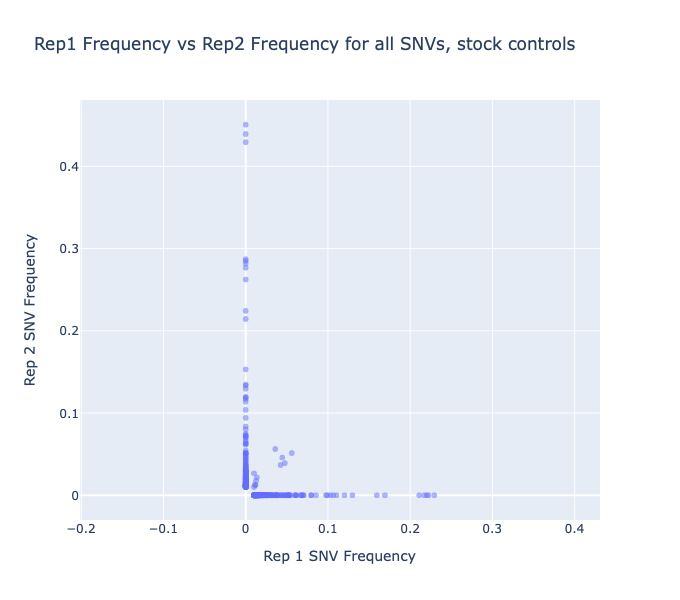

In [78]:
import plotly.express as px

# Scatter plot of rep1_freq vs rep2_freq
fig = px.scatter(stocks, 
                 x="Frequency_1", 
                 y="Frequency_2", 
                 title="Rep1 Frequency vs Rep2 Frequency for all SNVs, stock controls",
                 labels={"Frequency_1": "Rep 1 SNV Frequency", "Frequency_2": "Rep 2 SNV Frequency"},
                 opacity=0.5,
                 hover_data=["sample_var"])

fig.update_layout(
    width=600,  # Set width
    height=600,  # Set height (same as width for square shape)
    xaxis=dict(scaleanchor="y")  # Ensures 1:1 aspect ratio
)

# Show the plot
fig.show()
# fig.savefig("seq/analysis/figures/rep1_rep2_freq_SNVs.pdf", bbox_inches='tight', dpi=300)
# fig.write_image("seq/analysis/figures/rep1_rep2_freq_SNVs.pdf")

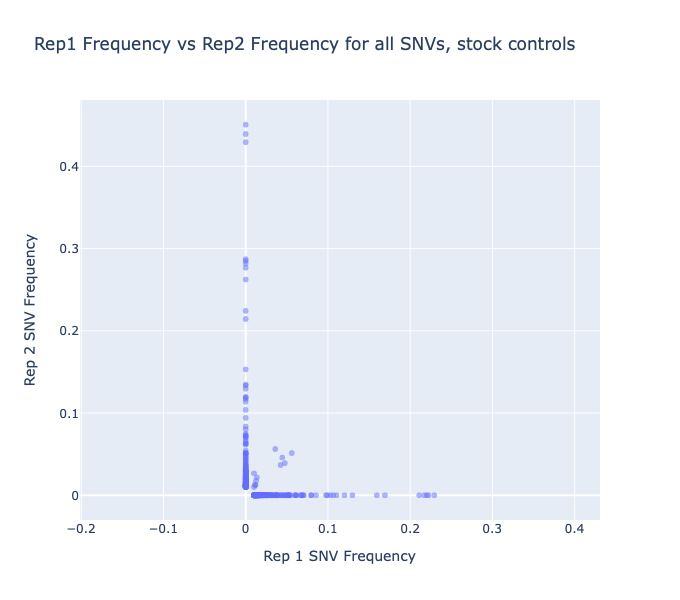

In [79]:
import plotly.express as px

# Scatter plot of rep1_freq vs rep2_freq
fig = px.scatter(stocks, 
                 x="Frequency_1", 
                 y="Frequency_2", 
                 title="Rep1 Frequency vs Rep2 Frequency for all SNVs, stock controls",
                 labels={"Frequency_1": "Rep 1 SNV Frequency", "Frequency_2": "Rep 2 SNV Frequency"},
                 opacity=0.5)

fig.update_layout(
    width=600,  # Set width
    height=600,  # Set height (same as width for square shape)
    xaxis=dict(scaleanchor="y")  # Ensures 1:1 aspect ratio
)

# Show the plot
fig.show()

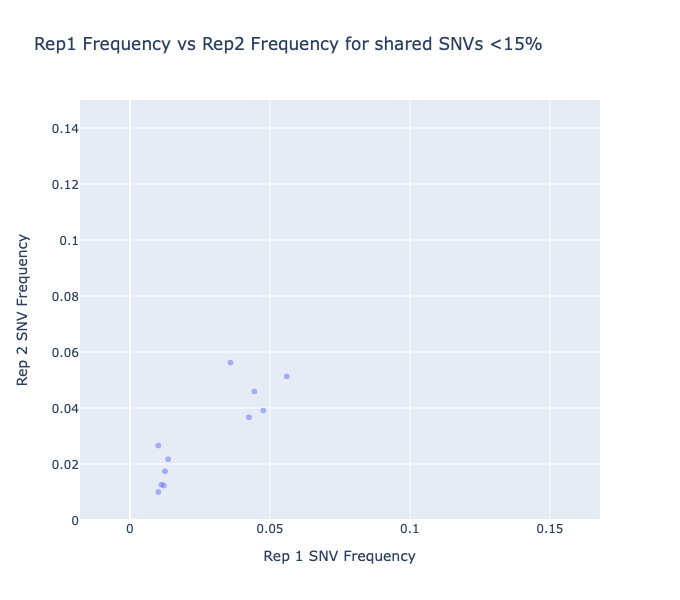

In [80]:
import plotly.express as px

# Scatter plot of rep1_freq vs rep2_freq
fig = px.scatter(shared_stock, 
                 x="Frequency_1", 
                 y="Frequency_2", 
                 title="Rep1 Frequency vs Rep2 Frequency for shared SNVs <15%",
                 labels={"Frequency_1": "Rep 1 SNV Frequency", "Frequency_2": "Rep 2 SNV Frequency"},
                 opacity=0.5,
                 hover_data=["sample_var"])

# Define axis limits
x_min, x_max = 0, 0.15  # Adjust as needed
y_min, y_max = 0, 0.15  # Adjust as needed

# Make the plot square and set axis limits
fig.update_layout(
    width=600,  
    height=600,  
    xaxis=dict(scaleanchor="y", range=[x_min, x_max]),  
    yaxis=dict(range=[y_min, y_max])
)

# Show the plot
fig.show()


In [81]:
valcts_sampleIDs = single_rep_stocks['sample'].value_counts()
print(valcts_sampleIDs)

h3_stock5    267
h3_stock4    152
h3_stock3     35
h3_stock1     25
h3_stock2     18
h3_stock6     14
Name: sample, dtype: int64


In [86]:
# Define your mapping from col_id to ct values
col_id_to_ct = {
    'h3_stock1': 16.8,
    'h3_stock2': 18.2,
    'h3_stock3': 21.9,  # Add as many as you need
    'h3_stock4': 26.5,
    'h3_stock5': 31.42,
    'h3_stock6': 35.8
}

# Create the new column using .map()
stocks['ct_value'] = stocks['sample'].map(col_id_to_ct)
stocks

segment  position allele coding_region_change gene  Frequency_1  \
0        mp       414      G            Val138Val   M1       0.0105   
1        mp       956      C           Ser319Stop   M2       0.0148   
2        mp       964      C            Gln322Lys   M2       0.0129   
3        na        99      G             Val33Val   NA       0.0114   
4        na       145      C             Gln49Lys   NA       0.0112   
..      ...       ...    ...                  ...  ...          ...   
517      np      1479      A            Ala493Ala   NP       0.0121   
518      np       168      G             Leu56Leu   NP       0.0359   
519      np      1152      A            Arg384Arg   NP       0.0136   
520      np      1482      A            Glu494Glu   NP       0.0101   
521     pb2      1025      A            Glu342Gly  PB2       0.0112   

     Frequency_2     sample amino_acid gene_pos         sample_var  \
0         0.0000  h3_stock1        138   M1_138      h3_sc1_HA_161   
1         0.0000  h3_stock1        319   M2_319      h3_sc1_HA_164   
2         0.0000  h3_stock1        322   M2_322      h3_sc1_HA_170   
3         0.0000  h3_stock1         33    NA_33      h3_sc1_HA_171   
4         0.0000  h3_stock1         49    NA_49      h3_sc1_HA_172   
..           ...        ...        ...      ...                ...   
517       0.0123  h3_stock3        493   NP_493   h3_stock4_NP_462   
518       0.0562  h3_stock4         56    NP_56   h3_stock4_NP_494   
519       0.0217  h3_stock4        384   NP_384   h3_stock4_NS1_86   
520       0.0266  h3_stock4        494   NP_494  h3_stock4_NS1_103   
521       0.0126  h3_stock5        342  PB2_342  h3_stock4_NS1_106   

           syn_non rep_shared  avg_freq   freq_bin  ct_value  
0       synonymous     single   0.01050  0.01–0.02     16.80  
1    nonsynonymous     single   0.01480  0.01–0.02     16.80  
2    nonsynonymous     single   0.01290  0.01–0.02     16.80  
3       synonymous     single   0.01140  0.01–0.02     16.80  
4    nonsynonymous     single   0.01120  0.01–0.02     16.80  
..             ...        ...       ...        ...       ...  
517     synonymous     shared   0.01220  0.01–0.02     21.90  
518     synonymous     shared   0.04605  0.04–0.05     26.50  
519     synonymous     shared   0.01765  0.01–0.02     26.50  
520     synonymous     shared   0.01835  0.01–0.02     26.50  
521  nonsynonymous     shared   0.01190  0.01–0.02     31.42  

[522 rows x 16 columns]

In [84]:
# Define your mapping from col_id to ct values
col_id_to_ct = {
    'h3_sc1': 25.2,
    'h3_sc2': 28.5,
    'h3_sc3': 32.2,  # Add as many as you need
    'h3_sc4': 37.6,
}

# Create the new column using .map()
syn_con['ct_value'] = syn_con['sample'].map(col_id_to_ct)
syn_con

/var/folders/b4/087mzk6d6sj828w5t9xtml640000gr/T/ipykernel_6558/1457689630.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



segment  position allele coding_region_change gene  Frequency_1  \
0        ha       483      T            Asn161Asn   HA       0.0000   
1        ha       492      C            Phe164Phe   HA       0.0000   
2        ha       510      A            Leu170Leu   HA       0.0000   
3        ha       513      T            Thr171Thr   HA       0.0000   
4        ha       514      A            Lys172Gln   HA       0.0000   
..      ...       ...    ...                  ...  ...          ...   
348      ns       689      C            Thr230Ile  NEP       0.4334   
349      ns       691      T           Stop231Arg  NEP       0.0101   
350      np        25      T              Ser9Pro   NP       0.0000   
351      np       106      A             Ile36Val   NP       0.0000   
352      np       185      C             Thr62Ile   NP       0.0000   

     Frequency_2  sample amino_acid gene_pos      sample_var        syn_non  \
0         1.0000  h3_sc1        161   HA_161   h3_sc1_HA_161     synonymous   
1         0.9932  h3_sc1        164   HA_164   h3_sc1_HA_164     synonymous   
2         1.0000  h3_sc1        170   HA_170   h3_sc1_HA_170     synonymous   
3         1.0000  h3_sc1        171   HA_171   h3_sc1_HA_171     synonymous   
4         1.0000  h3_sc1        172   HA_172   h3_sc1_HA_172  nonsynonymous   
..           ...     ...        ...      ...             ...            ...   
348       0.0000  h3_sc3        230  NEP_230  h3_sc3_NEP_230  nonsynonymous   
349       0.0000  h3_sc3        231  NEP_231  h3_sc3_NEP_231  nonsynonymous   
350       0.0193  h3_sc4          9     NP_9     h3_sc4_NP_9  nonsynonymous   
351       0.0170  h3_sc4         36    NP_36    h3_sc4_NP_36  nonsynonymous   
352       0.0154  h3_sc4         62    NP_62    h3_sc4_NP_62  nonsynonymous   

    rep_shared  ct_value  
0       single      25.2  
1       single      25.2  
2       single      25.2  
3       single      25.2  
4       single      25.2  
..         ...       ...  
348     single      32.2  
349     single      32.2  
350     single      37.6  
351     single      37.6  
352     single      37.6  

[353 rows x 14 columns]

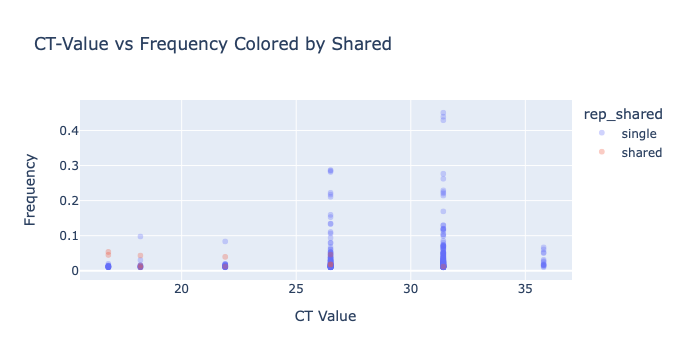

In [87]:
import plotly.express as px

fig = px.scatter(stocks, 
                 x="ct_value", 
                 y="avg_freq", 
                 color="rep_shared", 
                 title="CT-Value vs Frequency Colored by Shared",
                 labels={"ct_value": "CT Value", "avg_freq": "Frequency"},
                 opacity=0.3)  # Adjust transparency for better visibility

fig.show()


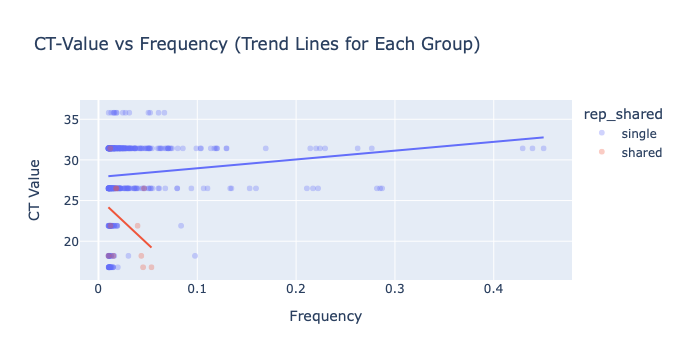

In [88]:
import plotly.express as px

fig = px.scatter(stocks, 
                 y="ct_value", 
                 x="avg_freq", 
                 color="rep_shared",  # Colors by 'rep_shared'
                 trendline="ols",      # Adds a trend line for each group
                 title="CT-Value vs Frequency (Trend Lines for Each Group)",
                 labels={"ct_value": "CT Value", "avg_freq": "Frequency"},
                 opacity=0.3)

fig.show()


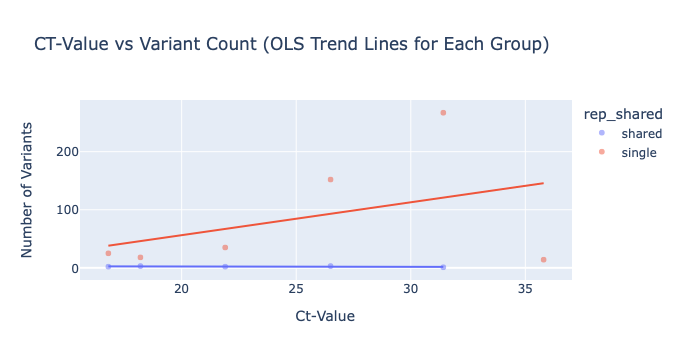

In [89]:
import plotly.express as px

# Count number of variants for each CT value and rep_shared group
variant_counts = stocks.groupby(["ct_value", "rep_shared"]).size().reset_index(name="variant_count")

# Scatter plot with trend line
fig = px.scatter(variant_counts, 
                 x="ct_value", 
                 y="variant_count",  # Now plotting count of variants
                 color="rep_shared",  
                 trendline="ols",    
                 title="CT-Value vs Variant Count (OLS Trend Lines for Each Group)",
                 labels={"ct_value": "Ct-Value", "variant_count": "Number of Variants"},
                 opacity=0.5)

fig.show()


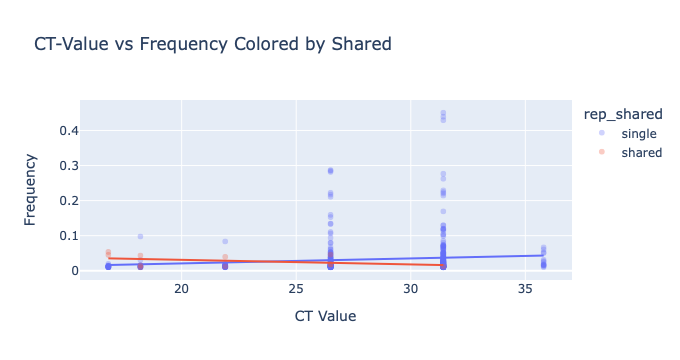

In [90]:
# fig = px.scatter(shared_vars, 
#                  x="ct_value", 
#                  y="avg_freq", 
#                  color="rep_shared", 
#                  title="CT-Value vs Frequency Colored by Shared",
#                  labels={"ct-value": "CT Value", "frequency": "Frequency"},
#                  opacity=0.3)  # Adjust transparency for better visibility

# fig.show()
import plotly.express as px

fig = px.scatter(stocks, 
                 x="ct_value", 
                 y="avg_freq", 
                 color="rep_shared", 
                 trendline="ols",  # Ordinary Least Squares (Linear Regression)
                 title="CT-Value vs Frequency Colored by Shared",
                 labels={"ct_value": "CT Value", "avg_freq": "Frequency"},
                 opacity=0.3)

fig.show()


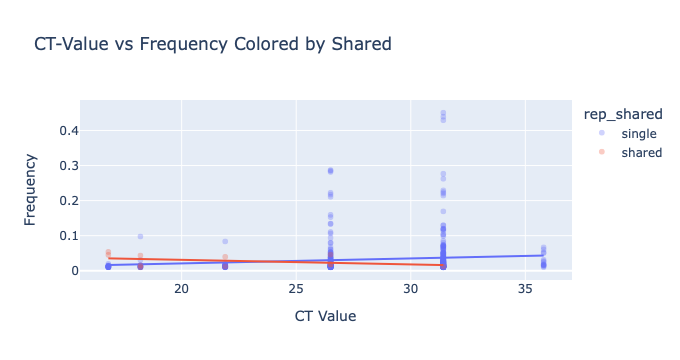

In [91]:
fig = px.scatter(stocks, 
                 x="ct_value", 
                 y="avg_freq", 
                 color="rep_shared", 
                 trendline="ols",  # Ordinary Least Squares (Linear Regression)
                 title="CT-Value vs Frequency Colored by Shared",
                 labels={"ct_value": "CT Value", "avg_freq": "Frequency"},
                 opacity=0.3)

fig.show()

In [ ]:
# define colors 

# blue/red scheme 1 (desaturated)
dom_color = "#C75643"
wild_color = "#545AB7"


# blue/red scheme 1 (desaturated)
dom_nonsyn_color = "#545AB7"
dom_syn_color = "#98B4DA"
wild_nonsyn_color = "#C75643"
wild_syn_color = "#E6B692"

In [92]:
single_rep_stocks

segment  position allele coding_region_change gene  Frequency_1  \
353      mp       414      G            Val138Val   M1       0.0105   
354      mp       956      C           Ser319Stop   M2       0.0148   
355      mp       964      C            Gln322Lys   M2       0.0129   
356      na        99      G             Val33Val   NA       0.0114   
357      na       145      C             Gln49Lys   NA       0.0112   
..      ...       ...    ...                  ...  ...          ...   
870      np       528      A            Ser176Ser   NP       0.0164   
871      np       769      A            Ile257Val   NP       0.0185   
872      np       850      G            Ala284Thr   NP       0.0505   
873      np       924      A            Gln308Gln   NP       0.0152   
874      np      1185      C            Asn395Asn   NP       0.0156   

     Frequency_2     sample amino_acid gene_pos        sample_var  \
353          0.0  h3_stock1        138   M1_138  h3_stock1_M1_138   
354          0.0  h3_stock1        319   M2_319  h3_stock1_M2_319   
355          0.0  h3_stock1        322   M2_322  h3_stock1_M2_322   
356          0.0  h3_stock1         33    NA_33   h3_stock1_NA_33   
357          0.0  h3_stock1         49    NA_49   h3_stock1_NA_49   
..           ...        ...        ...      ...               ...   
870          0.0  h3_stock6        176   NP_176  h3_stock6_NP_176   
871          0.0  h3_stock6        257   NP_257  h3_stock6_NP_257   
872          0.0  h3_stock6        284   NP_284  h3_stock6_NP_284   
873          0.0  h3_stock6        308   NP_308  h3_stock6_NP_308   
874          0.0  h3_stock6        395   NP_395  h3_stock6_NP_395   

           syn_non rep_shared  avg_freq  
353     synonymous     single    0.0105  
354  nonsynonymous     single    0.0148  
355  nonsynonymous     single    0.0129  
356     synonymous     single    0.0114  
357  nonsynonymous     single    0.0112  
..             ...        ...       ...  
870     synonymous     single    0.0164  
871  nonsynonymous     single    0.0185  
872  nonsynonymous     single    0.0505  
873     synonymous     single    0.0152  
874     synonymous     single    0.0156  

[511 rows x 14 columns]

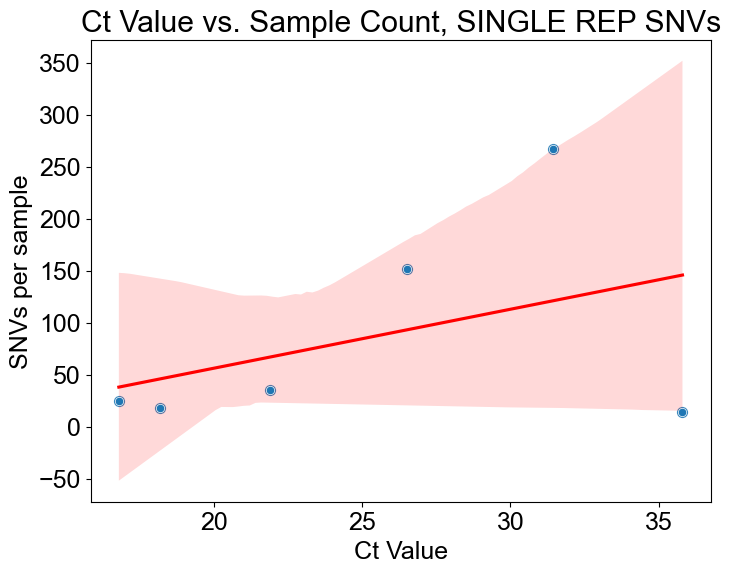

In [97]:
# Count occurrences of each sample_ID

single_rep_stocks = stocks[stocks['rep_shared'] == 'single']

sample_counts = single_rep_stocks['sample'].value_counts().reset_index()
sample_counts.columns = ['sample', 'count']

# Merge with Ct values (assuming each sample_ID has a unique Ct value)
merged_df = single_rep_stocks[['sample', 'ct_value']].drop_duplicates().merge(sample_counts, on='sample')

# Scatter plot
plt.figure(figsize=(8, 6))

sns.regplot(data=merged_df, x='ct_value', y='count', scatter_kws={'s': 50}, line_kws={'color': 'red'})

sns.scatterplot(data=merged_df, x='ct_value', y='count')


# Labels and title
plt.xlabel('Ct Value')
plt.ylabel('SNVs per sample')
plt.title('Ct Value vs. Sample Count, SINGLE REP SNVs')


plt.show()


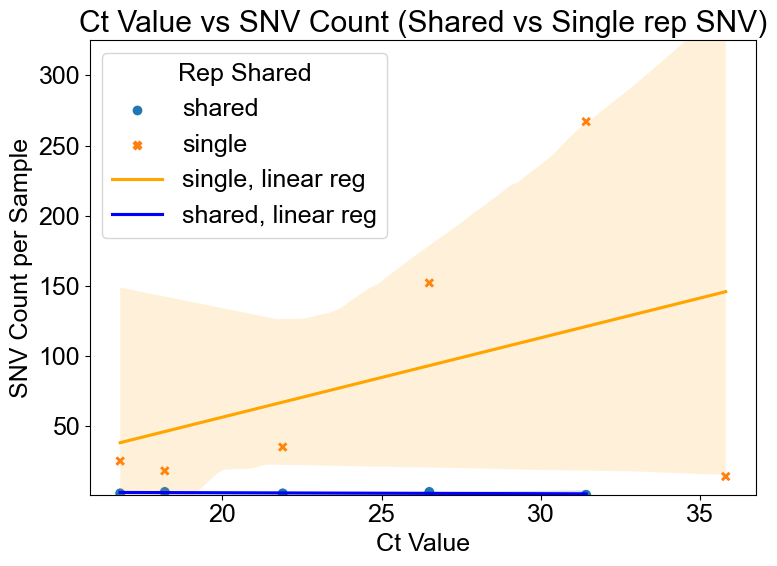

In [98]:
# Group by sample_ID and rep_shared to count SNVs
rep_counts = stocks.groupby(['sample', 'rep_shared']).size().reset_index(name='count')

# Merge in Ct values (assuming unique per sample_ID)
sample_metadata = stocks[['sample', 'ct_value']].drop_duplicates()
rep_counts = rep_counts.merge(sample_metadata, on='sample')


plt.figure(figsize=(8, 6))

# Scatterplot and regression per group
sns.scatterplot(data=rep_counts, x='ct_value', y='count', hue='rep_shared', style='rep_shared', s=60)
sns.regplot(data=rep_counts[rep_counts['rep_shared'] == 'single'], 
            x='ct_value', y='count', scatter=False, label='single, linear reg', color='orange')
sns.regplot(data=rep_counts[rep_counts['rep_shared'] == 'shared'], 
            x='ct_value', y='count', scatter=False, label='shared, linear reg', color='blue')

# Labels and formatting
plt.xlabel('Ct Value')
plt.ylabel('SNV Count per Sample')
plt.title('Ct Value vs SNV Count (Shared vs Single rep SNV)')
plt.ylim(1,325)
plt.legend(title='Rep Shared')
plt.tight_layout()

# plt.savefig("seq/analysis/figures/ctval_snvcount_regress.pdf", bbox_inches='tight', dpi=300)
plt.show()


In [99]:
stocks['gene_pos_nt'] = stocks['gene'] + "_" + stocks['position'].astype(str)
stocks.head(5)

segment  position allele coding_region_change gene  Frequency_1  \
0      mp       414      G            Val138Val   M1       0.0105   
1      mp       956      C           Ser319Stop   M2       0.0148   
2      mp       964      C            Gln322Lys   M2       0.0129   
3      na        99      G             Val33Val   NA       0.0114   
4      na       145      C             Gln49Lys   NA       0.0112   

   Frequency_2     sample amino_acid gene_pos     sample_var        syn_non  \
0          0.0  h3_stock1        138   M1_138  h3_sc1_HA_161     synonymous   
1          0.0  h3_stock1        319   M2_319  h3_sc1_HA_164  nonsynonymous   
2          0.0  h3_stock1        322   M2_322  h3_sc1_HA_170  nonsynonymous   
3          0.0  h3_stock1         33    NA_33  h3_sc1_HA_171     synonymous   
4          0.0  h3_stock1         49    NA_49  h3_sc1_HA_172  nonsynonymous   

  rep_shared  avg_freq   freq_bin  ct_value gene_pos_nt  
0     single    0.0105  0.01–0.02      16.8      M1_414  
1     single    0.0148  0.01–0.02      16.8      M2_956  
2     single    0.0129  0.01–0.02      16.8      M2_964  
3     single    0.0114  0.01–0.02      16.8       NA_99  
4     single    0.0112  0.01–0.02      16.8      NA_145

In [101]:
shared_stock.columns

Index(['segment', 'position', 'allele', 'coding_region_change', 'gene',
       'Frequency_1', 'Frequency_2', 'sample', 'amino_acid', 'gene_pos',
       'sample_var', 'syn_non', 'rep_shared', 'avg_freq'],
      dtype='object')

In [102]:
shared_stock['gene_pos_nt'] = shared_stock['gene'] + "_" + shared_stock['position'].astype(str)
shared_stock.head(5)

/var/folders/b4/087mzk6d6sj828w5t9xtml640000gr/T/ipykernel_6558/917374181.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



segment  position allele coding_region_change gene  Frequency_1  \
361      np       168      G             Leu56Leu   NP       0.0444   
367      pa      1465      T            Cys489Ser   PA       0.0560   
382      np       168      G             Leu56Leu   NP       0.0476   
388      np      1479      A            Ala493Ala   NP       0.0125   
391      ns       433      A            Ile145Val  NS1       0.0101   

     Frequency_2     sample amino_acid gene_pos         sample_var  \
361       0.0459  h3_stock1         56    NP_56    h3_stock1_NP_56   
367       0.0513  h3_stock1        489   PA_489   h3_stock1_PA_489   
382       0.0391  h3_stock2         56    NP_56    h3_stock2_NP_56   
388       0.0174  h3_stock2        493   NP_493   h3_stock2_NP_493   
391       0.0100  h3_stock2        145  NS1_145  h3_stock2_NS1_145   

           syn_non rep_shared  avg_freq gene_pos_nt  
361     synonymous     shared   0.04515      NP_168  
367  nonsynonymous     shared   0.05365     PA_1465  
382     synonymous     shared   0.04335      NP_168  
388     synonymous     shared   0.01495     NP_1479  
391  nonsynonymous     shared   0.01005     NS1_433

In [103]:
# Group by 'sample_ID' and 'gene' and count unique values in 'synonymous/nonsynonymous'
syn_nonsyn_counts = shared_stock.groupby(['sample', 'gene'])['syn_non'].value_counts().unstack(fill_value=0)

# Optionally, reset index to make it easier to work with
syn_nonsyn_counts = syn_nonsyn_counts.reset_index()

# Print or export the result
syn_nonsyn_counts


syn_non     sample gene  nonsynonymous  synonymous
0        h3_stock1   NP              0           1
1        h3_stock1   PA              1           0
2        h3_stock2   NP              0           2
3        h3_stock2  NS1              1           0
4        h3_stock3   NP              0           2
5        h3_stock4   NP              0           3
6        h3_stock5  PB2              1           0

In [104]:
# Group by 'sample_ID' and 'gene' and count unique values in 'synonymous/nonsynonymous'
syn_nonsyn_counts = shared_stock.groupby(['sample'])['syn_non'].value_counts().unstack(fill_value=0)

# Optionally, reset index to make it easier to work with
total_syn_nonsyn_counts = syn_nonsyn_counts.reset_index()
total_syn_nonsyn_counts = total_syn_nonsyn_counts.rename_axis(None, axis=1).reset_index()

total_syn_nonsyn_counts = total_syn_nonsyn_counts.drop(columns=['index'])

# Print or export the result
total_syn_nonsyn_counts.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   sample         5 non-null      object
 1   nonsynonymous  5 non-null      int64 
 2   synonymous     5 non-null      int64 
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes


In [105]:
total_syn_nonsyn_counts

sample  nonsynonymous  synonymous
0  h3_stock1              1           1
1  h3_stock2              1           2
2  h3_stock3              0           2
3  h3_stock4              0           3
4  h3_stock5              1           0

In [ ]:
# merged_df = pd.merge(total_syn_nonsyn_counts, ct_df, on='sample_ID')
# merged_df

In [ ]:
# merged_df.to_csv('../Desktop/HPAI_PA/2025_03_04_total_syn_nonsyn_counts.tsv',sep='\t', index=False)

In [ ]:
# merged_df.columns

In [ ]:
# fig = px.scatter(merged_df, x='ct_value', y="synonymous", color = 'sample_ID', symbol = 'domestic_status', width=950, height=600)
#                  #, symbol = 'domestic_status', color='Species')
# fig.show()

In [106]:
syn_nonsyn_counts.tail(35)

syn_non    nonsynonymous  synonymous
sample                              
h3_stock1              1           1
h3_stock2              1           2
h3_stock3              0           2
h3_stock4              0           3
h3_stock5              1           0

In [ ]:
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
plt.rc('text', usetex='false') 
plt.rcParams.update({'font.size': 18})

In [107]:
shared_stock.tail(30)

segment  position allele coding_region_change gene  Frequency_1  \
361      np       168      G             Leu56Leu   NP       0.0444   
367      pa      1465      T            Cys489Ser   PA       0.0560   
382      np       168      G             Leu56Leu   NP       0.0476   
388      np      1479      A            Ala493Ala   NP       0.0125   
391      ns       433      A            Ile145Val  NS1       0.0101   
412      np       168      G             Leu56Leu   NP       0.0425   
414      np      1479      A            Ala493Ala   NP       0.0121   
488      np       168      G             Leu56Leu   NP       0.0359   
510      np      1152      A            Arg384Arg   NP       0.0136   
518      np      1482      A            Glu494Glu   NP       0.0101   
818     pb2      1025      A            Glu342Gly  PB2       0.0112   

     Frequency_2     sample amino_acid gene_pos         sample_var  \
361       0.0459  h3_stock1         56    NP_56    h3_stock1_NP_56   
367       0.0513  h3_stock1        489   PA_489   h3_stock1_PA_489   
382       0.0391  h3_stock2         56    NP_56    h3_stock2_NP_56   
388       0.0174  h3_stock2        493   NP_493   h3_stock2_NP_493   
391       0.0100  h3_stock2        145  NS1_145  h3_stock2_NS1_145   
412       0.0367  h3_stock3         56    NP_56    h3_stock3_NP_56   
414       0.0123  h3_stock3        493   NP_493   h3_stock3_NP_493   
488       0.0562  h3_stock4         56    NP_56    h3_stock4_NP_56   
510       0.0217  h3_stock4        384   NP_384   h3_stock4_NP_384   
518       0.0266  h3_stock4        494   NP_494   h3_stock4_NP_494   
818       0.0126  h3_stock5        342  PB2_342  h3_stock5_PB2_342   

           syn_non rep_shared  avg_freq gene_pos_nt  
361     synonymous     shared   0.04515      NP_168  
367  nonsynonymous     shared   0.05365     PA_1465  
382     synonymous     shared   0.04335      NP_168  
388     synonymous     shared   0.01495     NP_1479  
391  nonsynonymous     shared   0.01005     NS1_433  
412     synonymous     shared   0.03960      NP_168  
414     synonymous     shared   0.01220     NP_1479  
488     synonymous     shared   0.04605      NP_168  
510     synonymous     shared   0.01765     NP_1152  
518     synonymous     shared   0.01835     NP_1482  
818  nonsynonymous     shared   0.01190    PB2_1025

In [108]:
grouped

freq_bin rep_shared  count  proportion
0    1-1.5%     shared      9    0.037657
1    1-1.5%     single    230    0.962343
2    1.5-2%     shared      1    0.011111
3    1.5-2%     single     89    0.988889
4    2-2.5%     shared      1    0.022222
5    2-2.5%     single     44    0.977778
6    2.5-3%     shared      1    0.034483
7    2.5-3%     single     28    0.965517
8      3-4%     shared      3    0.083333
9      3-4%     single     33    0.916667
10     4-5%     shared      4    0.210526
11     4-5%     single     15    0.789474
12    5-10%     shared      3    0.068182
13    5-10%     single     41    0.931818
14     >10%     shared      0    0.000000
15     >10%     single     31    1.000000

/var/folders/b4/087mzk6d6sj828w5t9xtml640000gr/T/ipykernel_6558/3504450530.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/b4/087mzk6d6sj828w5t9xtml640000gr/T/ipykernel_6558/3504450530.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



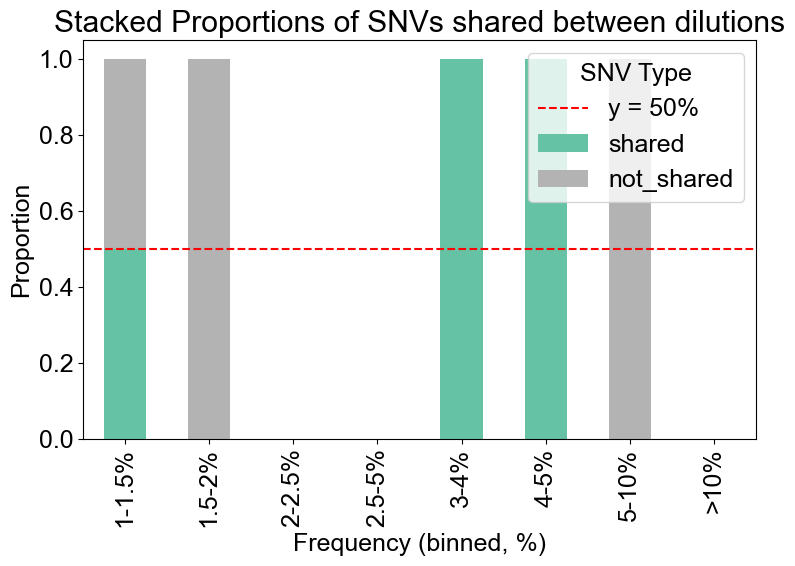

In [109]:
shared_stock['between_dilution'] = shared_stock['gene_pos'].duplicated(keep=False).map({True: 'shared', False: 'not_shared'})
shared_stock

# Example bin edges
bins = [0.01, 0.015, 0.02, 0.025, 0.03, 0.04, 0.05, 0.1, float('inf')]
labels = ['1-1.5%', '1.5-2%', '2-2.5%','2.5-5%', '3-4%', '4-5%', '5-10%', '>10%']
shared_stock['freq_bin'] = pd.cut(shared_stock['avg_freq'], bins=bins, labels=labels, right=False)

# Count occurrences of each category in each bin
grouped = shared_stock.groupby(['freq_bin', 'between_dilution']).size().reset_index(name='count')

# Normalize within each bin
grouped['proportion'] = grouped.groupby('freq_bin')['count'].transform(lambda x: x / x.sum())


# Pivot data for stacked bar chart
pivot_df = grouped.pivot(index='freq_bin', columns='between_dilution', values='proportion').fillna(0)

pivot_df = pivot_df[['shared', 'not_shared']]


# Plot
pivot_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='Set2')

plt.axhline(y=0.5, color='r', linestyle='--', label='y = 50%')


plt.xlabel('Frequency (binned, %)')
plt.ylabel('Proportion')
plt.title('Stacked Proportions of SNVs shared between dilutions')
plt.legend(title='SNV Type', loc='best')
plt.tight_layout()
plt.show()


In [110]:
##pulling out variants that appear in more than one sample

# Assuming your dataframe is named 'df'
duplicated_gene_pos = shared_stock[shared_stock['gene_pos'].duplicated()]

# To get just the duplicated values in the 'gene_pos' column
duplicated_values = shared_stock[shared_stock['gene_pos'].duplicated()]['gene_pos'].unique()

# Print the duplicated values
print(duplicated_values)

['NP_56' 'NP_493']


In [117]:
# Get rows where 'gene_pos' is NOT duplicated (i.e., appears only once)
unique_gene_pos_rows = shared_stock[~shared_stock['gene_pos'].duplicated(keep=False)]

# If you just want the values (not full rows)
unique_gene_pos_values = unique_gene_pos_rows['gene_pos'].unique()

# Print the unique (non-duplicated) values
print(unique_gene_pos_values)


['PA_489' 'NS1_145' 'NP_384' 'NP_494' 'PB2_342']


In [119]:
# Assuming your dataframe is named 'df' and the list of values is 'specific_values'
specific_values = ['PA_489' ,'NS1_145', 'NP_384', 'NP_494' ,'PB2_342']  # replace with your specific values

# Filter the rows where 'gene_pos' is in the specific list of values
filtered_rows = shared_stock[shared_stock['gene_pos'].isin(specific_values)]

# Print the filtered rows
print(filtered_rows)


    segment  position allele coding_region_change gene  Frequency_1  \
367      pa      1465      T            Cys489Ser   PA       0.0560   
391      ns       433      A            Ile145Val  NS1       0.0101   
510      np      1152      A            Arg384Arg   NP       0.0136   
518      np      1482      A            Glu494Glu   NP       0.0101   
818     pb2      1025      A            Glu342Gly  PB2       0.0112   

     Frequency_2     sample amino_acid gene_pos         sample_var  \
367       0.0513  h3_stock1        489   PA_489   h3_stock1_PA_489   
391       0.0100  h3_stock2        145  NS1_145  h3_stock2_NS1_145   
510       0.0217  h3_stock4        384   NP_384   h3_stock4_NP_384   
518       0.0266  h3_stock4        494   NP_494   h3_stock4_NP_494   
818       0.0126  h3_stock5        342  PB2_342  h3_stock5_PB2_342   

           syn_non rep_shared  avg_freq gene_pos_nt between_dilution freq_bin  
367  nonsynonymous     shared   0.05365     PA_1465       not_shared    

In [111]:
duplicated_values.tolist()

['NP_56', 'NP_493']

In [112]:
# Assuming your dataframe is named 'df' and the list of values is 'specific_values'
specific_values = ['NP_56','NP_493']  # replace with your specific values

# Filter the rows where 'gene_pos' is in the specific list of values
filtered_rows = shared_stock[shared_stock['gene_pos'].isin(specific_values)]

# Print the filtered rows
print(filtered_rows)


    segment  position allele coding_region_change gene  Frequency_1  \
361      np       168      G             Leu56Leu   NP       0.0444   
382      np       168      G             Leu56Leu   NP       0.0476   
388      np      1479      A            Ala493Ala   NP       0.0125   
412      np       168      G             Leu56Leu   NP       0.0425   
414      np      1479      A            Ala493Ala   NP       0.0121   
488      np       168      G             Leu56Leu   NP       0.0359   

     Frequency_2     sample amino_acid gene_pos        sample_var     syn_non  \
361       0.0459  h3_stock1         56    NP_56   h3_stock1_NP_56  synonymous   
382       0.0391  h3_stock2         56    NP_56   h3_stock2_NP_56  synonymous   
388       0.0174  h3_stock2        493   NP_493  h3_stock2_NP_493  synonymous   
412       0.0367  h3_stock3         56    NP_56   h3_stock3_NP_56  synonymous   
414       0.0123  h3_stock3        493   NP_493  h3_stock3_NP_493  synonymous   
488       0.0562

In [113]:
print(filtered_rows['gene_pos'].nunique)

<bound method IndexOpsMixin.nunique of 361     NP_56
382     NP_56
388    NP_493
412     NP_56
414    NP_493
488     NP_56
Name: gene_pos, dtype: object>


In [114]:
filtered_rows = filtered_rows.sort_values(by=["gene", "position"], ascending=[False, True])
filtered_rows

segment  position allele coding_region_change gene  Frequency_1  \
361      np       168      G             Leu56Leu   NP       0.0444   
382      np       168      G             Leu56Leu   NP       0.0476   
412      np       168      G             Leu56Leu   NP       0.0425   
488      np       168      G             Leu56Leu   NP       0.0359   
388      np      1479      A            Ala493Ala   NP       0.0125   
414      np      1479      A            Ala493Ala   NP       0.0121   

     Frequency_2     sample amino_acid gene_pos        sample_var     syn_non  \
361       0.0459  h3_stock1         56    NP_56   h3_stock1_NP_56  synonymous   
382       0.0391  h3_stock2         56    NP_56   h3_stock2_NP_56  synonymous   
412       0.0367  h3_stock3         56    NP_56   h3_stock3_NP_56  synonymous   
488       0.0562  h3_stock4         56    NP_56   h3_stock4_NP_56  synonymous   
388       0.0174  h3_stock2        493   NP_493  h3_stock2_NP_493  synonymous   
414       0.0123  h3_stock3        493   NP_493  h3_stock3_NP_493  synonymous   

    rep_shared  avg_freq gene_pos_nt between_dilution freq_bin  
361     shared   0.04515      NP_168           shared     4-5%  
382     shared   0.04335      NP_168           shared     4-5%  
412     shared   0.03960      NP_168           shared     3-4%  
488     shared   0.04605      NP_168           shared     4-5%  
388     shared   0.01495     NP_1479           shared   1-1.5%  
414     shared   0.01220     NP_1479           shared   1-1.5%

In [115]:
filtered_rows['gene'].value_counts()

NP    6
Name: gene, dtype: int64

/var/folders/b4/087mzk6d6sj828w5t9xtml640000gr/T/ipykernel_6558/3875428843.py:9: UserWarning:

The palette list has more values (4) than needed (1), which may not be intended.



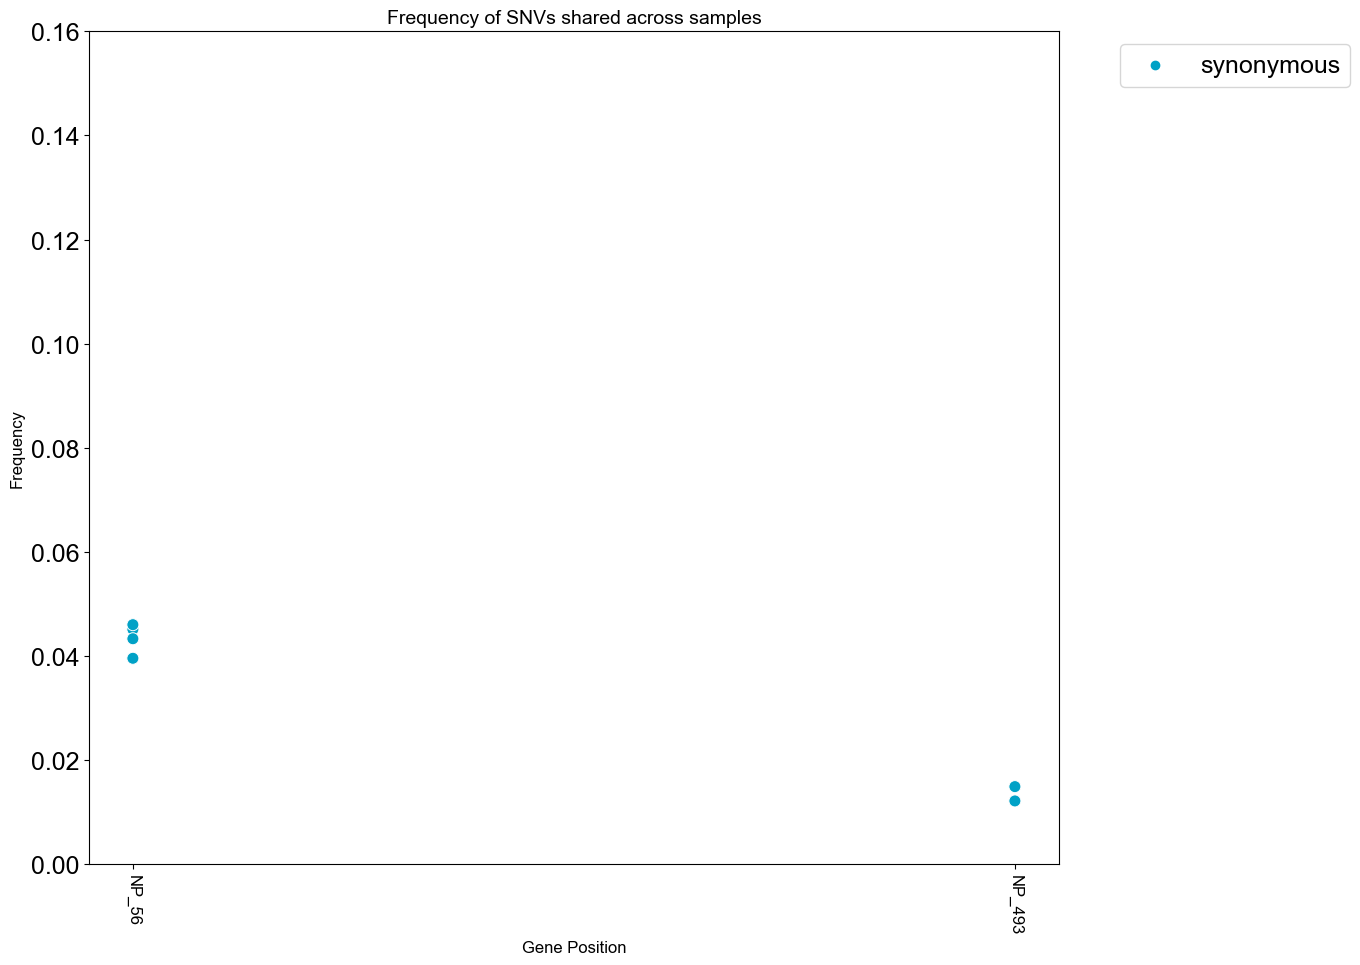

In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# # Filter the dataframe
# pb1_shared = filtered_rows[filtered_rows["gene"] == "PB1"]

# Create the plot
plt.figure(figsize=(14, 10))
sns.scatterplot(data=filtered_rows, x="gene_pos", y="avg_freq", hue="syn_non", palette=["#00A1C6", "#e8702a","#0c457d","#F5BF47"],
               s=75)

# Formatting
plt.xlabel("Gene Position", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Frequency of SNVs shared across samples", fontsize=14)
plt.xticks(rotation=270, fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylim(0,0.16)
# plt.yscale('log')

# Show the plot
plt.tight_layout()

# plt.savefig('seq/analysis/figures/SNVs_shared_across_samples.pdf', dpi=300)
plt.show()
